In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
import os
import cv2
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# Check GPU
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# import package
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (Input, Dense, Dropout, Activation,
                                     Flatten, BatchNormalization, Conv2D,
                                     MaxPooling2D, GlobalAveragePooling2D)

from keras.applications import MobileNet, MobileNetV2, VGG16, VGG19, Xception
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
   
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [4]:
## read the file image into a list

data_path = "./train"

x_data_list = []
y_data_list = []
for roots, dirs, files in os.walk(data_path):
    for each in files:
        if each.find('checkpoint') == -1:
            x_data_list.append(os.path.join(roots, each))
            y_data_list.append(roots.split("/")[-1])

In [5]:
## decide on the image size 
img_size = 224

(224, 224)


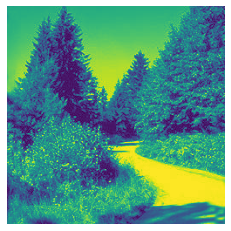

In [6]:
##check out images with read & resize code

img = cv2.imread(x_data_list[2], 0)
img = cv2.resize(img, (img_size, img_size))
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
#since the pictures are in grey scale, add one extra diamention for calculation
img = img[..., np.newaxis]
print(img.shape)

(224, 224, 1)


In [8]:
#### read & resize image (incase the images are different sizes)
## functino for process all images 

def load_img(data_list):
    data_img = []
    for each in tqdm(data_list):
        img = cv2.imread(each, 0)
        img = cv2.resize(img, (img_size, img_size))
        data_img.append(img[..., np.newaxis])

    return np.array(data_img).astype('float32')/255.

In [9]:
##process the images with function

x_data = load_img(x_data_list)

100%|██████████| 2985/2985 [00:02<00:00, 1145.09it/s]


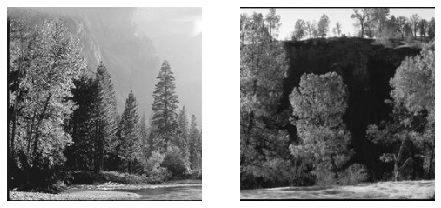

In [10]:
# show post-processed image
plt.figure(figsize=(16, 8))
for i in range(2):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_data[i][..., 0], cmap='gray')  #show in gray color
    plt.axis('off')
plt.show()

In [11]:
#get the labelled information into dataframe

y_data_list = pd.DataFrame(y_data_list, columns=['label'])
uniques = y_data_list['label'].value_counts().index
counts = y_data_list['label'].value_counts().values

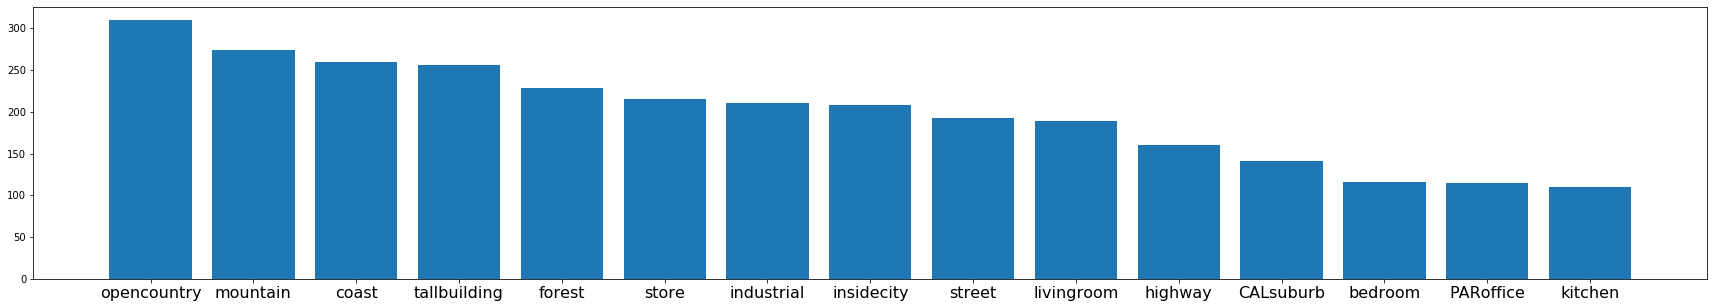

In [12]:
#plot category information in bar graph for distribution

plt.figure(figsize=(30, 5))
plt.bar(uniques, counts)
plt.xticks(fontsize=16)
plt.show()

In [13]:
#match the label information(mapping.txt) to the labels

class_path = "./"
class_map = pd.read_csv(os.path.join(class_path, 'mapping.txt'),
                        header=None, index_col=0)
class_map = class_map.to_dict()[1]

In [14]:
y_data = y_data_list['label'].map(class_map).values.copy()

In [15]:
##split train & validaton set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.1,
                                                    random_state=10,
                                                    stratify=y_data)

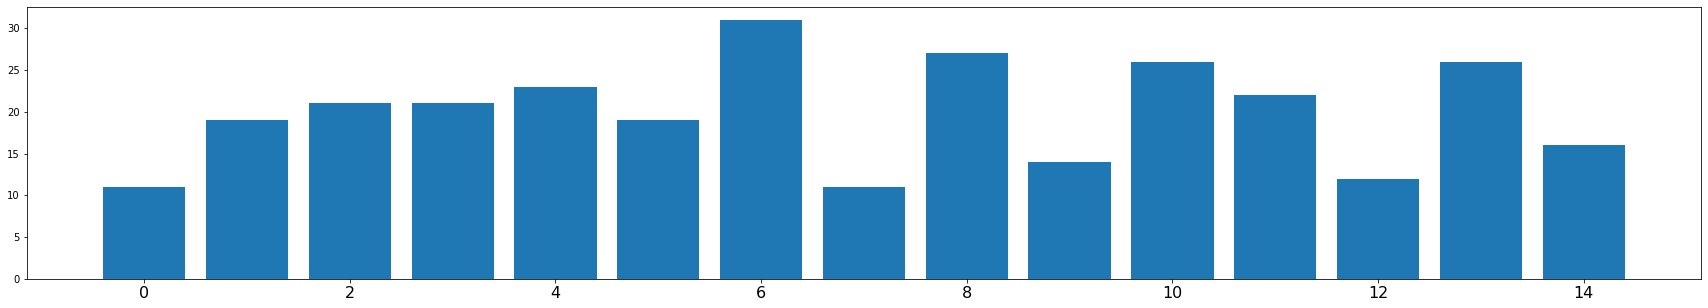

In [16]:
#plot category information in bar graph for distribution in train dataset


uniques, counts = np.unique(y_test, return_counts=True)

plt.figure(figsize=(30, 5))
plt.bar(uniques, counts)
plt.xticks(fontsize=16)
plt.show()

In [17]:
y_train

array([10, 14, 11, ..., 13,  9,  5])

In [18]:
##one hot encodes all the categories

num_classes = len(uniques)

y_train = np.eye(num_classes, dtype='float32')[y_train]
y_test = np.eye(num_classes, dtype='float32')[y_test]
print('y_train shape:', y_train.shape)

y_train shape: (2686, 15)


In [ ]:
# # define model structure.
# inputs = Input(shape=(img_size, img_size, 1))

# x = Conv2D(32, (3, 5), padding='same', activation='relu')(inputs)
# x = Conv2D(32, (3, 5), padding='same', activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# # x = Dropout(0.25)(x)

# x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
# x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# # x = Dropout(0.25)(x)

# x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# # x = Dropout(0.25)(x)
# outputs = Dense(num_classes, activation='softmax')(x)


# model_1 = Model(inputs=inputs, outputs=outputs)
# # print(model_1.summary())
# # plot_model(model, to_file='ex2_Model.png', show_shapes=True)

In [ ]:
# model_dir = './Model/model_1-logs'
# if not os.path.exists(model_dir):
#     os.makedirs(model_dir)

# logfiles = model_dir + '/{}-{}'.format('basic_model',
#                                        model_1.__class__.__name__)
# model_cbk = keras.callbacks.TensorBoard(log_dir=logfiles,
#                                         histogram_freq=1)

# modelfiles = model_dir + '/{}-best-model.h5'.format('basic_model')
# model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
#                                              monitor='val_accuracy',
#                                              save_best_only=True)

# earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
#                                           patience=5,
#                                           verbose=1)


# callbacks_list = [model_cbk, model_mckp, earlystop]

In [ ]:
# learning_rate = 0.001
# optimizer = keras.optimizers.Adam(lr=learning_rate)

# model_1.compile(loss='categorical_crossentropy',
#                 optimizer=optimizer,
#                 metrics=['accuracy'])

In [ ]:
# batch_size = 32
# epochs = 20

# history_1 = model_1.fit(x_train, y_train,
#                         batch_size=batch_size,
#                         epochs=epochs,
#                         verbose=1,
#                         validation_data=(x_test, y_test),
#                         callbacks=callbacks_list)

In [ ]:
# 用 model_2 試看看 data augmentation 的威力吧!!!

inputs = Input(shape=x_train.shape[1:])

x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
# x = Dropout(0.25)(x)
outputs = Dense(num_classes, activation='softmax')(x)


model_2 = Model(inputs=inputs, outputs=outputs)

In [ ]:
learning_rate = 0.001
optimizer = keras.optimizers.Adam(lr=learning_rate)
batch_size = 32
epochs = 20

In [ ]:
# initiate optimizer
model_2.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
model_dir = './Model/model_2-logs'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

logfiles = model_dir + '/{}-{}'.format('basic_model',
                                       model_2.__class__.__name__)
model_cbk = keras.callbacks.TensorBoard(log_dir=logfiles,
                                        histogram_freq=1)

modelfiles = model_dir + '/{}-best-model.h5'.format('basic_model')
model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                             monitor='val_accuracy',
                                             save_best_only=True)

earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                          patience=5,
                                          verbose=1)


callbacks_list = [model_cbk, model_mckp, earlystop]

In [ ]:
num_step = x_train.shape[0] // batch_size

In [ ]:
datagen = ImageDataGenerator(
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=False,
                             fill_mode='nearest',
                             cval=0,
                             )


history_2 = model_2.fit_generator(datagen.flow(x_train, y_train,
                                               batch_size=batch_size),
                                  steps_per_epoch=num_step,
                                  epochs=epochs,
                                  validation_data=(x_test, y_test),
                                  callbacks=callbacks_list
                                 )

In [ ]:
model = load_model('./Model/model_2-logs/basic_model-best-model.h5')
loss, acc = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(-1)

In [ ]:
class_names = np.array([each for each in class_map.keys()])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test.argmax(-1), y_pred))
print(confusion_matrix(y_test.argmax(-1), y_pred))

In [ ]:
import seaborn as sns

matrix = confusion_matrix(y_test.argmax(-1), y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cbar=False, cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
train_history = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
name_history = ['training_loss', 'val_loss', 'training_acc', 'val_acc']

plt.figure(figsize=(12, 5))
for eachx, eachy, i in zip(train_history, name_history, range(4)):
    if i % 2 == 0:
        plt.subplot(1, 2, i//2+1)
    l_x = len(history_1.history[eachx])
    plt.plot(np.arange(l_x), history_1.history[eachx], label=eachy)
    plt.legend(loc='best')
    plt.title('model_1 '+eachy)
plt.show()


plt.figure(figsize=(12, 5))
for eachx, eachy, i in zip(train_history, name_history, range(4)):
    if i % 2 == 0:
        plt.subplot(1, 2, i//2+1)
    l_x = len(history_2.history[eachx])
    plt.plot(np.arange(l_x), history_2.history[eachx], label=eachy)
    plt.legend(loc='best')
    plt.title('model_2 ' + eachy)
plt.show()

In [ ]:
#clean up data for the testset

data_path = "./testset"

test_image = []
test_image_id = []
for roots, dirs, files in os.walk(data_path):
    for each in files:
        if each.find('checkpoint') == -1:
            test_image.append(os.path.join(roots, each))
            #need the full diectory to run load image
            test_image_id.append(each.split(".")[0])

In [ ]:
#use the function to load image(see cell-7 at beginning of the code)

test_train = load_img(test_image)
print(test_train.shape)

In [ ]:
#prediction for test dataset
ans = model.predict(test_train)
result = np.argmax(ans,axis=1)
result_lst = result.tolist()

In [ ]:
test_submission = pd.DataFrame({'Id':test_image_id, 'class': result_lst})
test_submission.to_csv('./test_submission.csv', index = False)